# **Laboratorul 7 PMP**

## **Exercitiul 1**

x (sample mean) = 58.0


Output()


Posterior summaries (95% HDI):
         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     58.001  0.766    56.415     59.504      0.020    0.020    1570.0   
sigma   2.348  0.677     1.307      3.706      0.016    0.018    1883.0   

       ess_tail  r_hat  
mu       1493.0    1.0  
sigma    2166.0    1.0  


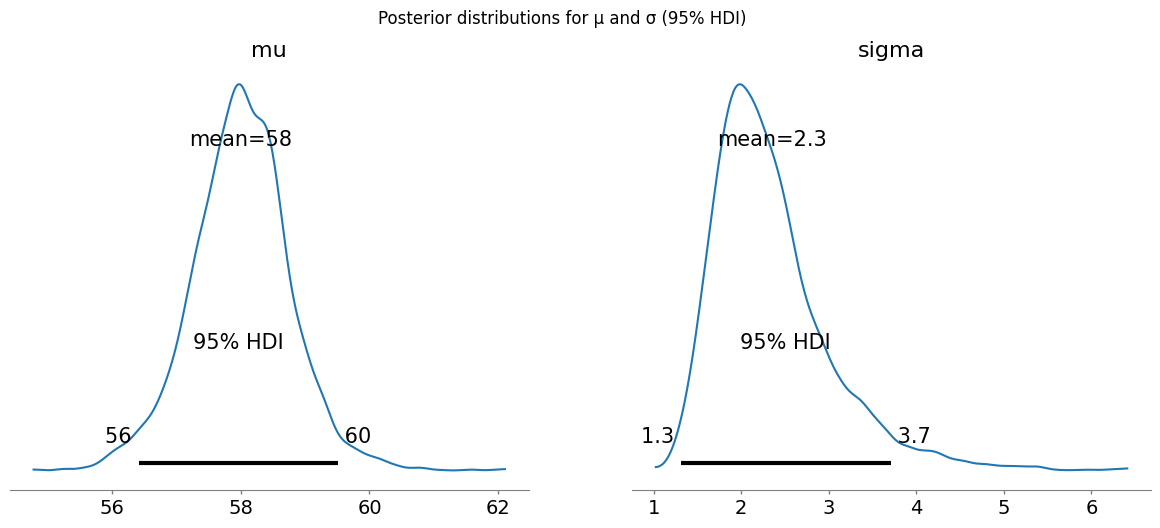


Frequentist estimates:
Sample mean = 58.000
Sample std (ddof=1) = 2.000


In [7]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# a)

data = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])

x_bar = data.mean()
print("x (sample mean) =", x_bar)

with pm.Model() as model:
    mu = pm.Normal("mu", mu=x_bar, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=data)

    trace = pm.sample(2000, tune=2000, target_accept=0.9, random_seed=42)

# b)

summary = az.summary(trace, var_names=["mu", "sigma"], hdi_prob=0.95)
print("\nPosterior summaries (95% HDI):")
print(summary)

az.plot_posterior(trace, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.suptitle("Posterior distributions for μ and σ (95% HDI)", fontsize=12)
plt.show()

# c)

freq_mean = data.mean()
freq_sd = data.std(ddof=1)
print("\nFrequentist estimates:")
print(f"Sample mean = {freq_mean:.3f}")
print(f"Sample std (ddof=1) = {freq_sd:.3f}")
